# Quantum Interference

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run -i "prerequisites.py"

# Power Monitor NoteBook

In [2]:
# powermeter1 = Powermeter('PM100USB', serial='P2003916', unit='dBm', wavelength=1550) 
unit='dBm'
wavelength=1550
#Alice (tele) powermeters 10/03/20:
PMa = PM('PM100USB', serial='P2007347',unit=unit, wavelength = wavelength)
PMb = PM('PM100USB', serial='P2010371',unit=unit, wavelength = wavelength) 
PMc = PM('PM100USB', serial='P2003683',unit=unit, wavelength = wavelength) 
PMd = PM('PM100USB', serial='P2008115',unit=unit, wavelength = wavelength)
#Charlie powermeters 10/03/20:
PMe = PM('PM100USB', serial='P2005653',unit=unit, wavelength = wavelength)
PMf = PM('PM100USB', serial='P2010372',unit=unit, wavelength = wavelength) 
PMg = PM('PM100USB', serial='P2008116',unit=unit, wavelength = wavelength) 
PMh = PM('PM100USB', serial='P2007346',unit=unit, wavelength = wavelength)

PM_idler = {"PMa":PMa,"PMb":PMb, "PMc":PMc,"PMd":PMd}
PM_signal = {"PMe":PMe,"PMf":PMf, "PMg":PMg,"PMh":PMh}
PM_all = {"PMa":PMa,"PMb":PMb, "PMc":PMc,"PMd":PMd, "PMe":PMe,"PMf":PMf, "PMg":PMg,"PMh":PMh}

### Laser

In [3]:
# Wavelengths
p_wavelength = 1549.3
i_wavelength = 1558.98
s_wavelength = 1539.77

unit='dBm'
serial_port_name = 'COM13'
mytunics = tunics(serial_port_name = serial_port_name, unit=unit)


Connected to Tunics laser on serial port COM13



In [4]:
# Laser Settings
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on') 
mytunics.laser_power(10) 

In [ ]:
LP.live_opt_pow(heaters = PM_all)

# Rings

In [5]:
# Read in Ring Volts
df = pd.read_csv("Ring_Coulping_Voltage.csv")
Ring_Volts = df.to_dict('r')[0]

In [6]:
# Setting the ring to have maximum number of entangled photons
for ring, volts in Ring_Volts.items():
    h.set_voltage(ring,volts)

In [7]:
ring = "MRR3"
h.set_voltage(ring,Ring_Volts[ring]-0.05)

In [8]:
ring = "MRR4"
h.set_voltage(ring,Ring_Volts[ring])

In [69]:
h.set_many_phases({"BS1":0,
    "BS2":pi/2,
    "BS3":pi/2,
    "WDM1":pi/2,
    "WDM2":pi/2,
    "WDM3":pi,
    "WDM4":pi,
    "Pre_RY1":pi,
    "Pre_RY2":pi,
    "Bell1":pi,
    "Bell2":pi,
    "Prj_RY1":pi,
    "Prj_RY2":pi,
    "Prj_RY3":pi,
    "Prj_RY4":pi/2,
    "Ctr_1":pi,
    "Ctr_2":pi,
    "Prj_RZ1":0,
    "Prj_RZ2":0,
    "Prj_RZ3":0,
    "Prj_RZ4":0,
    "Pre_RZ1":0,
    "Pre_RZ2":0,})

# Measurements

In [70]:
%run -i "SC_Prerequisites.py"

<Figure size 432x288 with 0 Axes>

### Swabian Time Tagger Configuration

In [71]:
## Configruation of the swabian setting the trigger levels for each channels and the input delays needed
channels = [3,8]
trigger_levels = {3:0.08, 8:0.08}
AA_input_delays = {3:0, 8:-4000}

SC.set_input_delays(AA_input_delays, tagger)
SC.set_trigger_levels(trigger_levels, tagger)

In [72]:
coinc = TT.Coincidences(tagger, [[3,8]], coincidenceWindow=1000)

In [73]:
coinc_channel = list(coinc.getChannels())

In [56]:
def quantum_interference(start, stop, reso):
    results = {}
    phases = np.arange(start, stop, reso)
    for phase in tqdm(phases):
        h.set_phase("Prj_RZ4", phase)
        time.sleep(1)
        Counter = TT.Counter(tagger, coinc_channel, binwidth = binwidth, n_values = n_values)
        time.sleep(binwidth/(10**12)*n_values)
        results[phase] = [Counter.getData(),PMd.measure_average(10)]
    return results

In [99]:
results = {}
phases = np.arange(0, 2*pi+pi/15, pi/15)
for phase in tqdm(phases):
    h.set_phase("Prj_RZ4", phase)
    time.sleep(0.5)
    results[phase] = [PMc.measure_average(10)]
    time.sleep(0.5)

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:33<00:00,  1.05s/it]


In [57]:
binwidth = 10**12 # in ps
n_values = 10 # binwdith * n_values = Total Time recorded

In [58]:
results = quantum_interference(0, 2*pi+pi/15, pi/15)

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [05:53<00:00, 11.06s/it]


In [100]:
results_backup = results

In [101]:
results

{0.0: [-9.904436597460425],
 0.20943951023931953: [-9.397478075974034],
 0.41887902047863906: [-8.994529148056307],
 0.6283185307179586: [-8.698592529510234],
 0.8377580409572781: [-8.51739055635166],
 1.0471975511965976: [-8.436632245156483],
 1.2566370614359172: [-8.516129554939855],
 1.4660765716752366: [-8.665963468614557],
 1.6755160819145563: [-8.845895057664972],
 1.8849555921538759: [-9.081163840846546],
 2.0943951023931953: [-9.50757936859721],
 2.3038346126325147: [-10.057907083665583],
 2.5132741228718345: [-10.753159969129104],
 2.722713633111154: [-11.474175153030886],
 2.9321531433504733: [-12.438257743498188],
 3.141592653589793: [-13.618363473246891],
 3.3510321638291125: [-15.01097373528997],
 3.560471674068432: [-16.666484148385713],
 3.7699111843077517: [-18.650621276208874],
 3.979350694547071: [-20.552826094454254],
 4.1887902047863905: [-21.57522402259901],
 4.39822971502571: [-20.693303620368855],
 4.607669225265029: [-18.615124953455048],
 4.817108735504349: [-1

In [78]:
for index, value in results.items():
    value[0] = value[0].sum()

In [102]:
x = []
y1 = []
y2 = []
for index, value in results.items():
    x.append(index)
    y1.append(value[0])
#     y2.append(value[1])

In [103]:
y1 = [(10**(y/10))/1000 for y in y1]

In [64]:
import matplotlib.pyplot as plt

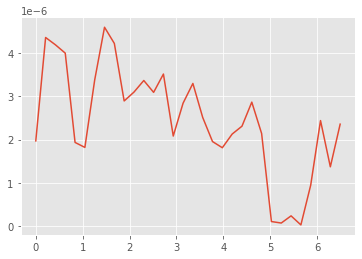

In [65]:
plt.plot(x, y2)

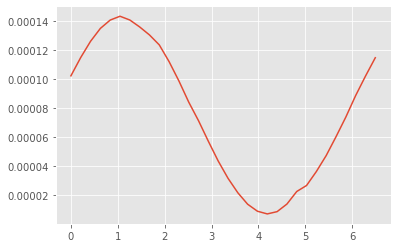

In [104]:
plt.plot(x, y1)

In [67]:
def Save_Results(results, path):
    df = pd.DataFrame(results)
    return df.to_csv(path+dt.now().strftime("%Y-%m-%d-%H-%M")+".csv")

In [105]:
Save_Results(results, "results/Counts_results_classical_interference")